In [132]:
import pandas as pd
import numpy as np
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, NMF, MiniBatchSparsePCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

In [83]:
df = pd.read_pickle('FT-data-DSpace/data_agreggated.pickle')
df = df[['Date', 'Meeting Number', 'Clean']]

In [84]:
df['Sentences'] = df['Clean'].apply(lambda x: ' '.join(x))
df['Date'] = pd.to_datetime(df['Date'])
df.sample(2)

,Date,Meeting Number,Clean,Sentences
691,2016-01-22 10:00:00,43. møde,"[mød, åbn, dag, følg, anmeld, pernil, rosenkra...",mød åbn dag følg anmeld pernil rosenkrantz the...
227,2011-11-10 10:00:00,9. møde,"[mød, åbn, udenrigsminist, villy, søvndal, med...",mød åbn udenrigsminist villy søvndal meddelt ø...


In [85]:
tvec = TfidfVectorizer(min_df=.05, max_df=.1)
x = tvec.fit_transform(df['Sentences'])

words = tvec.get_feature_names()

In [86]:
df_x = pd.DataFrame(columns= words, data=x.toarray())
df_x['Date'] = df['Date']
df_x['Meeting'] = df['Meeting Number']
df_x.sample(2)

,a4,aaja,abildgaard,abon,abstrak,acceler,acceptabl,adam,adopt,adspurg,...,økonomiforhandling,økonomiminist,økonomistyring,øktem,ønskværd,øresund,øret,ørum,Date,Meeting
587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,2015-01-16 10:00:00,43. møde
425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.01122,0.0,2013-05-30 10:00:00,105. møde


### PCA

In [ ]:
pca = MiniBatchSparsePCA(n_components=500,alpha = 1e-3, n_jobs=4, batch_size=30) #normal PCA does not work
pca_result = pca.fit_transform(df_x[words].values)
df_x['pca-one'] = pca_result[:,0]
df_x['pca-two'] = pca_result[:,1] 
df_x['pca-three'] = pca_result[:,2]
#print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [155]:
kmeans = KMeans(n_clusters=5).fit(pca_result)
df_x['label'] = kmeans.labels_

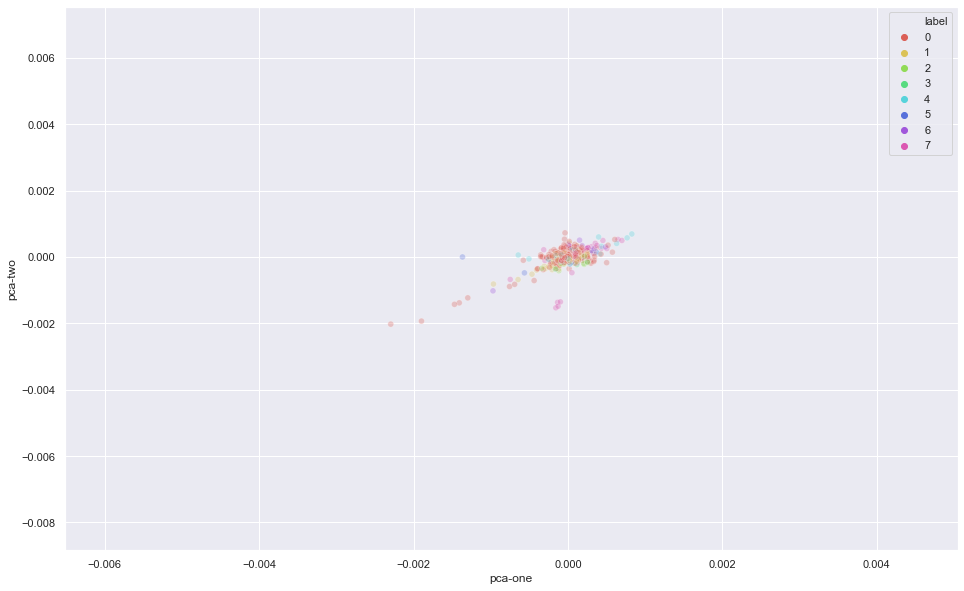

In [156]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='label',
    palette=sns.color_palette("hls", 8),
    data=df_x,
    legend="full",
    alpha=0.3
)

#### T-SNE

In [157]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 863 samples in 0.038s...
[t-SNE] Computed neighbors for 863 samples in 0.354s...
[t-SNE] Computed conditional probabilities for sample 863 / 863
[t-SNE] Mean sigma: 0.290471
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.904236
[t-SNE] KL divergence after 1000 iterations: 1.075794
t-SNE done! Time elapsed: 9.90895390510559 seconds


In [158]:
df_x['tsne_component_one'] = tsne_results[:,0]
df_x['tsne_component_two'] = tsne_results[:,1]

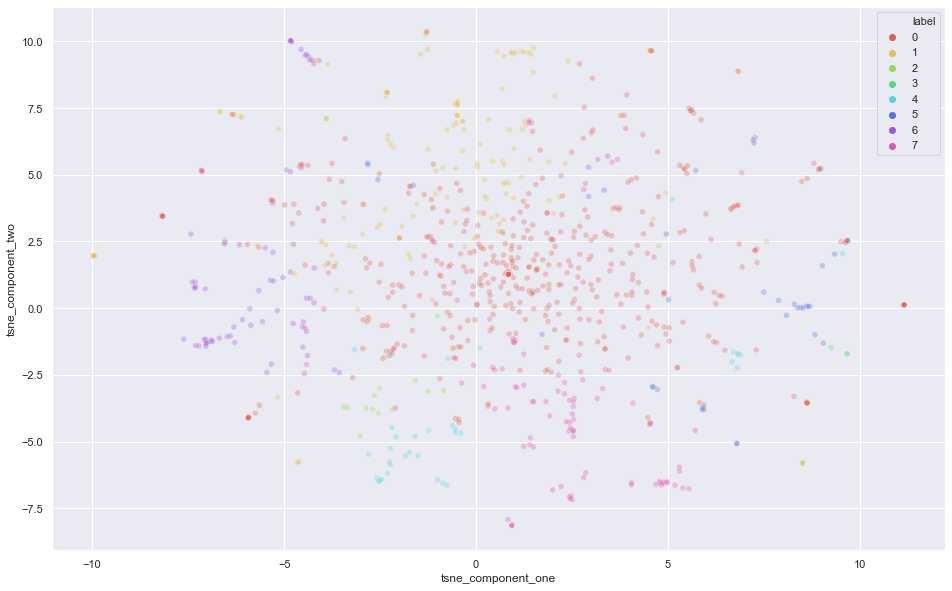

In [159]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_component_one", y="tsne_component_two",
    hue='label',
    palette=sns.color_palette("hls", 8),
    data=df_x,
    legend="full",
    alpha=0.3
)

In [60]:
df_x

,a4,aaja,abildgaard,abon,abstrak,acceler,acceptabl,adam,adopt,adspurg,...,økonomistyring,øktem,ønskværd,øresund,øret,ørum,Date,Meeting,tsne_component_one,tsne_component_two
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.091834,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,2009-10-06 12:00:00,1. møde,-36.762115,-7.909033
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.109193,0.0,0.019848,...,0.000000,0.0,0.0,0.0,0.0,0.180651,2009-10-07 13:00:00,2. møde,0.957133,-13.950020
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.057091,0.0,0.008648,...,0.000000,0.0,0.0,0.0,0.0,0.000000,2009-10-08 10:00:00,3. møde,2.144365,-12.623138
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,2009-10-20 13:00:00,4. møde,0.557251,28.924280
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.018997,0.0,0.0,0.0,0.0,0.000000,2009-10-21 13:00:00,5. møde,-3.110007,0.560847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.009834,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,2017-05-11 10:00:00,96. møde,27.504431,-10.900779
859,0.000000,0.010548,0.009316,0.029461,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,2017-05-16 13:00:00,97. møde,-26.821974,-17.606819
860,0.000000,0.000000,0.016764,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,2017-05-17 13:00:00,98. møde,-3.038120,13.887568
861,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,2017-05-18 10:00:00,99. møde,-40.034546,-11.828839
